In [1]:
import os

os.chdir("../")

%pwd

'c:\\Users\\P52s\\Documents\\Obsidian\\Semestre 1 IDSCC5\\5eme année\\Data mining\\TPs'

## 1. La théorie derrière l'algorithme KNN

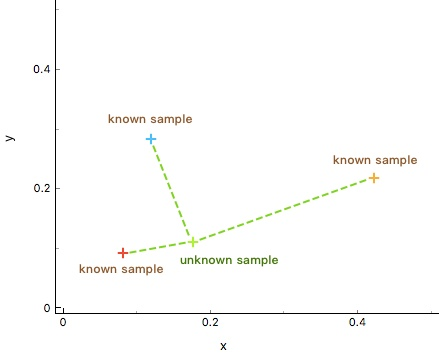

Comme illustré dans la figure ci-dessus, en calculant la distance entre les données $X_{u}$ (échantillon inconnu) et les catégories connues $\{\omega_{1}, \omega_{2}, \omega_{3}\}$ (échantillons connus), nous évaluons la similarité entre $X_{u}$ et différents ensembles d'entraînement, pour finalement déterminer la catégorie de $X_{u}$. De toute évidence, il est plus approprié d'associer l'échantillon inconnu vert aux échantillons connus rouges.

## Formulation Mathématiques

Formulons l'algorithme K-Nearest Neighbors (KNN) avec la distance de Minkowski, une généralisation des distances euclidienne et de Manhattan, définie par $d(x, x_i) = \left( \sum_{j=1}^{n} \lvert x_j - x_{i,j} \rvert^p \right)^{\frac{1}{p}}$, où $p$ contrôle la forme de la distance (p = 2 pour l'euclidienne, p = 1 pour Manhattan).

1. **Entraînement :** Stocker les données d'entraînement $X$ et leurs étiquettes $Y$.

2. **Prédiction :**
   - Calculer la distance de Minkowski entre le point de test $x$ et chaque point d'entraînement $x_i$.
   - Sélectionner les $k$ voisins les plus proches en fonction de ces distances.
   - Compter les occurrences de chaque classe parmi les $k$ voisins les plus proches.
   - Prédire la classe du point de test en choisissant celle avec la fréquence maximale.

L'algorithme KNN avec la distance de Minkowski s'exprime généralement comme suit :

$$
\forall x \in X, \hat{y}(x) = \arg\max_{y_j} \left( \sum_{i=1}^{k} \delta(y_i, y_j) \right)
$$

où $\delta(y_i, y_j)$ est basé sur la distance de Minkowski :

$$
\delta(y_i, y_j) = \begin{cases} 
1 & \text{si } d(x, x_i) \text{ est parmi les } k \text{ plus petites distances pour la classe } y_j \\
0 & \text{sinon}
\end{cases}
$$



- $\delta(y_i, y_j)$: La fonction delta de Kronecker, qui vaut 1 si $y_i$ est égal à $y_j$ et 0 sinon.
- $\sum_{i=1}^{k} \delta(y_i, y_j)$: La somme des occurrences de la classe $y_j$ parmi les $k$ voisins les plus proches de $x$.
- $\arg\max_{y_j}$: L'opération qui renvoie la classe $y_j$ pour laquelle la somme des occurrences est maximale.


In [2]:
import pandas as pd
import numpy as np

### Data Preparation

Ci-dessous, nous essayons de compléter un processus de classification KNN. Tout d'abord, nous générons un ensemble de données d'échantillon avec deux catégories (`A` et `B`), où chaque donnée contient deux caractéristiques (`x` et `y`) :

In [6]:
"""
Generate a set of sample data
"""

def create_data():
    features = np.array(
        [[2.88, 3.05], [3.1, 2.45], [3.05, 2.8], [2.9, 2.7], [2.75, 3.4],
         [3.23, 2.9], [3.2, 3.75], [3.5, 2.9], [3.65, 3.6],[3.35, 3.3]])
    labels = ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']
    return features, labels

In [7]:
'''
Print the data
'''

features, labels = create_data()
print('features: \n',features)
print('labels: \n',labels)

features: 
 [[2.88 3.05]
 [3.1  2.45]
 [3.05 2.8 ]
 [2.9  2.7 ]
 [2.75 3.4 ]
 [3.23 2.9 ]
 [3.2  3.75]
 [3.5  2.9 ]
 [3.65 3.6 ]
 [3.35 3.3 ]]
labels: 
 ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']


Pour comprendre les données de manière plus intuitive, l'ensemble des données est visualisé à l'aide du paquet **pyplot** de Matplotlib. Par souci de simplicité, nous avons utilisé la fonction `map` et l'expression `lambda` pour traiter les données. Si vous n'êtes pas familier avec ces deux méthodes, vous êtes supposé acquérir les connaissances Python correspondantes par vous-même :

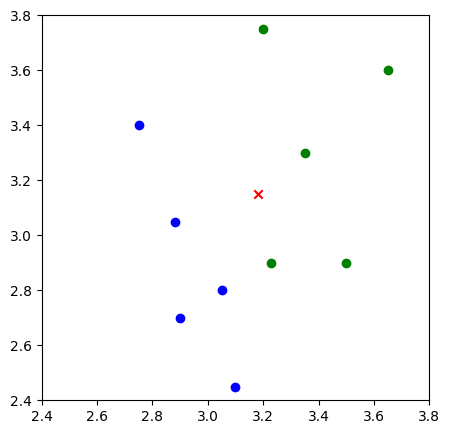

In [8]:
"""
Draw the sample data
"""

from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(5, 5))
plt.xlim((2.4, 3.8))
plt.ylim((2.4, 3.8))
x_feature=list(map(lambda x:x[0],features)) # Return feature x of each data
y_feature=list(map(lambda y:y[1],features)) 
plt.scatter(x_feature[:5],y_feature[:5],c="b") # Draw the data points of A
plt.scatter(x_feature[5:],y_feature[5:],c="g") 
plt.scatter([3.18],[3.15],c="r",marker="x") # The coordinates of the testing point: [3.1，3.2]

Comme indiqué dans la figure ci-dessus, les données avec l'étiquette `A` (point <font color="blue">bleu</font>) se trouvent dans le coin inférieur gauche, et les données avec l'étiquette `B` (point <font color="green">vert</font>) se trouvent dans le coin supérieur droit. Nous pouvons observer la distribution des données étiquetées de manière différente. Le point <font color="red">rouge x</font> indique les données de test.

In [9]:
"""
Manhattan Distance
"""

import numpy as np

def d_man(x, y):
    d = np.sum(np.abs(x - y))
    return d

x = np.array([3.1, 3.2])
print("x:", x)
y = np.array([2.5, 2.8])
print("y:", y)
d_man = d_man(x, y)
print(d_man)

x: [3.1 3.2]
y: [2.5 2.8]
1.0000000000000004


In [10]:
"""
Euclidean distance
"""

import numpy as np

def d_euc(x, y):
    d = np.sqrt(np.sum(np.square(x - y)))
    return d

x = np.random.random(10)  # Randomly generate an array of 10 numbers as the value of x
print("x:", x)
y = np.random.random(10)
print("y:", y)
distance_euc = d_euc(x, y)
print(distance_euc)

x: [0.04577016 0.58008979 0.62104953 0.04469785 0.46109243 0.96128913
 0.55971579 0.65394197 0.55355825 0.86837957]
y: [0.61704109 0.64459281 0.39188326 0.1253247  0.65365264 0.35456635
 0.35536687 0.90118938 0.35486958 0.4186616 ]
1.0673959694255133


In [11]:
"""
Majority voting method
"""

import operator

def majority_voting(class_count):
    sorted_class_count = sorted(class_count.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_class_count

arr = {'A': 3, 'B': 2, "C": 6, "D": 5}
majority_voting(arr)

[('C', 6), ('D', 5), ('A', 3), ('B', 2)]

In [12]:
"""
Complete realization of KNN From Scratch
"""

def knn_classify(test_data, train_data, labels, k):
    distances = np.array([])  # Create an empty array to save the distance
    for each_data in train_data:  # Calculate data similarity using Euclidean distance
        d = d_euc(test_data, each_data)
        distances = np.append(distances, d)

    sorted_distance_index = distances.argsort()  # Get the indices sorted by distance
    sorted_distance = np.sort(distances)

    r = (sorted_distance[k]+sorted_distance[k-1])/2  # Calculate the radius
    
    class_count = {}
    for i in range(k):  # Majority vote
        vote_label = labels[sorted_distance_index[i]]
        class_count[vote_label] = class_count.get(vote_label, 0) + 1
    final_label = majority_voting(class_count)
    return final_label, r

In [13]:
test_data=np.array([3.18,3.15])
final_label,r=knn_classify(test_data, features, labels, 5)
final_label

[('B', 3), ('A', 2)]

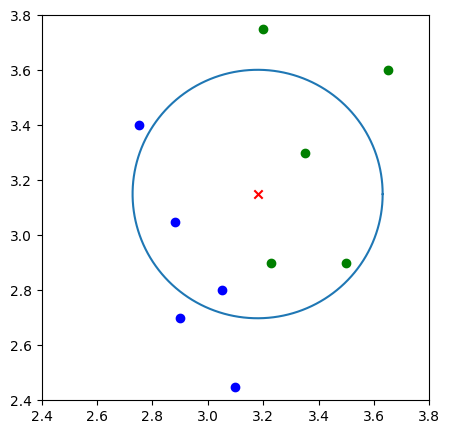

In [14]:
def circle(r, a, b):  # Polar coordinates ：x=r*cosθ，y=r*sinθ.
    theta = np.arange(0, 2*np.pi, 0.01)
    x = a+r * np.cos(theta)
    y = b+r * np.sin(theta)
    return x, y

k_circle_x, k_circle_y = circle(r, 3.18, 3.15)

plt.figure(figsize=(5, 5))
plt.xlim((2.4, 3.8))
plt.ylim((2.4, 3.8))
x_feature = list(map(lambda x: x[0], features))  # Return feature x of each data
y_feature = list(map(lambda y: y[1], features))
plt.scatter(x_feature[:5],y_feature[:5],c="b") # Draw the data points of A
plt.scatter(x_feature[5:],y_feature[5:],c="g") 
plt.scatter([3.18],[3.15],c="r",marker="x") # The coordinates of the testing point: [3.1，3.2]
plt.plot(k_circle_x, k_circle_y)

In [19]:
%pip install ipywidgets
from ipywidgets import interact, fixed

def change_k(test_data, features, k):
    final_label, r = knn_classify(test_data, features, labels, k)
    k_circle_x, k_circle_y = circle(r, 3.18, 3.15)
    plt.figure(figsize=(5, 5))
    plt.xlim((2.4, 3.8))
    plt.ylim((2.4, 3.8))
    x_feature = list(map(lambda x: x[0], features))  # Return feature x of each data
    y_feature = list(map(lambda y: y[1], features))
    plt.scatter(x_feature[:5],y_feature[:5],c="b") # Draw the data points of A
    plt.scatter(x_feature[5:],y_feature[5:],c="g") 
    plt.scatter([3.18],[3.15],c="r",marker="x") # The coordinates of the testing point: [3.1，3.2]
    plt.plot(k_circle_x, k_circle_y)

interact(change_k, test_data=fixed(test_data),
         features=fixed(features), k=[3, 5, 7, 9])

   ---------------------------------------- 0.0/139.4 kB ? eta -:--:--
   -------- ------------------------------- 30.7/139.4 kB 1.3 MB/s eta 0:00:01
   ----------------- --------------------- 61.4/139.4 kB 544.7 kB/s eta 0:00:01
   -------------------- ------------------ 71.7/139.4 kB 491.5 kB/s eta 0:00:01
   ------------------------- ------------- 92.2/139.4 kB 581.0 kB/s eta 0:00:01
   ------------------------------------ - 133.1/139.4 kB 561.1 kB/s eta 0:00:01
   -------------------------------------- 139.4/139.4 kB 516.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/214.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/214.9 kB ? eta -:--:--
   ----- --------------------------------- 30.7/214.9 kB 640.0 kB/s eta 0:00:01
   ----------- --------------------------- 61.4/214.9 kB 409.6 kB/s eta 0:00:01
   -------------- ------------------------ 81.9/214.9 kB 508.4 kB/s eta 0:00:01
   -------------- ------------------------ 81.9/214.9 kB 508.4 kB/s